# Convolutional Neural Netwok
## ML Kamar Berantakan

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.8.0


In [2]:
# persiapkan datanya
#!wget --no-check-certificate \
#  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
#  -O /tmp/messy_vs_clean_room.zip

--2021-07-14 01:50:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  2.39MB/s    in 20s     

2021-07-14 01:50:36 (3.32 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [2]:
# melakukan ekstraksi pada file tsb
import zipfile,os
#local_zip = 'E:\Ripki Alfinnur\Belajar_Ai\Jurnal Ai\messy-vs-clean-room.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('E:\Ripki Alfinnur\Belajar_Ai\Jurnal Ai\tmp')
#zip_ref.close()
 
base_dir = 'E:\Ripki Alfinnur\Belajar_Ai\Tugas Akhir\PLD_3_Classes_256'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')
os.listdir('E:\Ripki Alfinnur\Belajar_Ai\Tugas Akhir\PLD_3_Classes_256\Training')

['Early_Blight', 'Healthy', 'Late_Blight']

In [3]:
os.listdir('E:\Ripki Alfinnur\Belajar_Ai\Tugas Akhir\PLD_3_Classes_256\Validation')

['Early_Blight', 'Healthy', 'Late_Blight']

In [4]:
# data train ditempatkan dalam train_dir
train_ealry = os.path.join(train_dir, 'Early_Blight')
train_healthy = os.path.join(train_dir, 'Healthy')
train_late = os.path.join(train_dir, 'Late_Blight')

# data validasi ditempatkan di validation_dir
val_early = os.path.join(validation_dir, 'Early_Blight')
val_healthy = os.path.join(validation_dir, 'Healthy')
val_late = os.path.join(validation_dir, 'Late_Blight')

In [5]:
# proses augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=32,
    # karena kita merupakan klarifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='categorical')

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.


In [14]:
# membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #resolusi
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
# memanggil fungsi compile pada objek model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint

# saving model
# checkpoint = ModelCheckpoint("clean_messy_model.h5",
#                              monitor="val_loss",
#                              save_best_only = True,
#                              verbose=1,
#                              mode = 'auto',
#                              save_freq = 'epoch')

# pelatihan model menggunakan fit
history = model.fit(
            train_generator,
            steps_per_epoch=64,  # berapa batch yang akan dieksekusi pada setiap epoch
            epochs=20,
            # callbacks = checkpoint,
            validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
            validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
            verbose=2)

Epoch 1/20
64/64 - 128s - loss: 0.6022 - accuracy: 0.4752 - val_loss: 0.5728 - val_accuracy: 0.5813 - 128s/epoch - 2s/step
Epoch 2/20
64/64 - 102s - loss: 0.4639 - accuracy: 0.6875 - val_loss: 0.2873 - val_accuracy: 0.8250 - 102s/epoch - 2s/step
Epoch 3/20
64/64 - 105s - loss: 0.3609 - accuracy: 0.7646 - val_loss: 0.2413 - val_accuracy: 0.8375 - 105s/epoch - 2s/step
Epoch 4/20
64/64 - 100s - loss: 0.4314 - accuracy: 0.7194 - val_loss: 0.4922 - val_accuracy: 0.6750 - 100s/epoch - 2s/step
Epoch 5/20
64/64 - 94s - loss: 0.3487 - accuracy: 0.7730 - val_loss: 0.2791 - val_accuracy: 0.8562 - 94s/epoch - 1s/step
Epoch 6/20
64/64 - 105s - loss: 0.2965 - accuracy: 0.8167 - val_loss: 0.2747 - val_accuracy: 0.8438 - 105s/epoch - 2s/step
Epoch 7/20
64/64 - 100s - loss: 0.2122 - accuracy: 0.8732 - val_loss: 0.2560 - val_accuracy: 0.8500 - 100s/epoch - 2s/step
Epoch 8/20
64/64 - 106s - loss: 0.1920 - accuracy: 0.8906 - val_loss: 0.2287 - val_accuracy: 0.8375 - 106s/epoch - 2s/step
Epoch 9/20
64/64 -

In [18]:
# melihat hasil dari model yang kita buat
from keras.models import load_model
import numpy as np
#from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

model=load_model("clean_messy_model.h5")
 
uploaded = files.upload() # using google colab text editor
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('\n Clean or Messy : CLEAN')
  else:
    print('\n Clean or Messy : MESSY')

NameError: name 'files' is not defined

KeyboardInterrupt: 

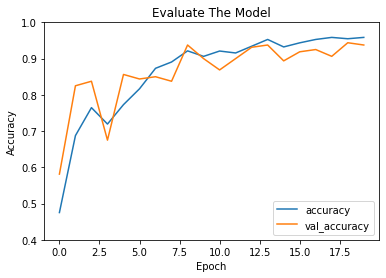

In [20]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
# Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.title("Evaluate The Model")
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_generator, verbose=2)

In [21]:
# cetak akurasi
print(test_acc)

0.9710858464241028


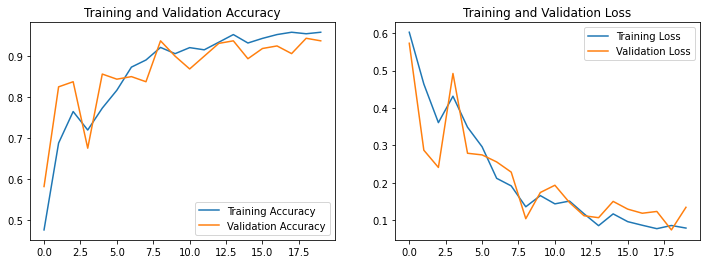

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

probas = model.predict_generator(generator=validation_generator)
y_true = validation_generator.classes
y_pred = np.argmax(probas, axis=1)

print(y_true.shape)
print(y_pred.shape)


print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

<ipython-input-26-4ac3134aa858>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probas = model.predict_generator(generator=validation_generator)


(416,)
(416,)
[[57 48 58]
 [38 24 40]
 [75 27 49]]
              precision    recall  f1-score   support

           0       0.34      0.35      0.34       163
           1       0.24      0.24      0.24       102
           2       0.33      0.32      0.33       151

    accuracy                           0.31       416
   macro avg       0.30      0.30      0.30       416
weighted avg       0.31      0.31      0.31       416



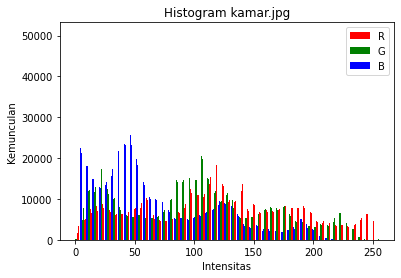

In [17]:
# Histogram Citra

from matplotlib import pyplot
from os.path import basename
from os.path import splitext
from PIL import Image

def get_file_name(local_zip):
    # https://stackoverflow.com/a/678266/9157799
    return splitext(basename(local_zip))[0]

def tampilkan_histogram(r, g, b, gambar):
    intensitas = list(range(256))
    lebar_bar = 0.3

    # https://stackoverflow.com/q/9304408/9157799
    intensitas = [i-lebar_bar for i in intensitas]
    # https://stackoverflow.com/q/14270391/9157799
    pyplot.bar(intensitas, r, width=lebar_bar, color='r')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, g, width=lebar_bar, color='g')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, b, width=lebar_bar, color='b')

    pyplot.title('Histogram ' + gambar)
    pyplot.xlabel('Intensitas')
    pyplot.ylabel('Kemunculan')
    pyplot.legend(['R', 'G', 'B'])
    pyplot.show()

def histogram(gambar):
    GAMBAR = Image.open(gambar)
    PIXEL = GAMBAR.load()

    ukuran_horizontal = GAMBAR.size[0]
    ukuran_vertikal = GAMBAR.size[1]

    gambar_r = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_r = gambar_r.load()

    gambar_g = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_g = gambar_g.load()

    gambar_b = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_b = gambar_b.load()

    # https://stackoverflow.com/q/10712002/9157799
    r = [0] * 256
    g = [0] * 256
    b = [0] * 256

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            intensitas_r = PIXEL[x, y][0]
            intensitas_g = PIXEL[x, y][1]
            intensitas_b = PIXEL[x, y][2]
            r[intensitas_r] += 1
            g[intensitas_g] += 1
            b[intensitas_b] += 1
            pixel_r[x, y] = (intensitas_r, 0, 0)
            pixel_g[x, y] = (0, intensitas_g, 0)
            pixel_b[x, y] = (0, 0, intensitas_b)

    gambar_r.save(get_file_name(gambar) + '_r.jpg')
    gambar_g.save(get_file_name(gambar) + '_g.jpg')
    gambar_b.save(get_file_name(gambar) + '_b.jpg')

    tampilkan_histogram(r, g, b, gambar)

histogram('kamar.jpg')